# Trabalho AV3 de Ciência de Dados
#### Carolina de Souza Ribeiro (2110868)
#### Marcelo de Souza Ribeiro (2417152)


# Início

## Import e configuração das bibliotecas

In [51]:
# Imports principais
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub

In [52]:
# Configurações de visualização
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas importadas com sucesso!")
print(f"Versão do pandas: {pd.__version__}")
print(f"Versão do numpy: {np.__version__}")

Bibliotecas importadas com sucesso!
Versão do pandas: 2.3.0
Versão do numpy: 2.3.0


In [53]:
# Configurações de visualização
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas importadas com sucesso!")
print(f"Versão do pandas: {pd.__version__}")
print(f"Versão do numpy: {np.__version__}")

Bibliotecas importadas com sucesso!
Versão do pandas: 2.3.0
Versão do numpy: 2.3.0


## Download do dataset

In [54]:
# Download do dataset diretamente do Kaggle
print("Baixando dataset da Olist do Kaggle...")

try:
    path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
    print(f"Dataset baixado com sucesso!")
    print(f"Caminho dos arquivos: {path}")

    # Listar todos os arquivos no diretório
    files = os.listdir(path)
    csv_files = [f for f in files if f.endswith(".csv")]

    print(f"\n{len(csv_files)} arquivos CSV encontrados:")
    for i, file in enumerate(csv_files, 1):
        file_path = os.path.join(path, file)
        file_size = os.path.getsize(file_path) / (1024*1024)  # MB
        print(f"  {i}. {file} ({file_size:.2f} MB)")

    # Salvar o caminho para uso posterior
    DATA_PATH = path

except Exception as e:
    print(f"Erro no download: {e}")
    print("Verifique se você tem acesso ao Kaggle e as credenciais configuradas")

Baixando dataset da Olist do Kaggle...
Dataset baixado com sucesso!
Caminho dos arquivos: C:\Users\User\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2

9 arquivos CSV encontrados:
  1. olist_customers_dataset.csv (8.62 MB)
  2. olist_geolocation_dataset.csv (58.44 MB)
  3. olist_orders_dataset.csv (16.84 MB)
  4. olist_order_items_dataset.csv (14.72 MB)
  5. olist_order_payments_dataset.csv (5.51 MB)
  6. olist_order_reviews_dataset.csv (13.78 MB)
  7. olist_products_dataset.csv (2.27 MB)
  8. olist_sellers_dataset.csv (0.17 MB)
  9. product_category_name_translation.csv (0.00 MB)


In [55]:
# Função auxiliar para carregar e inspecionar cada tabela
def quick_inspect(filename, data_path):
    """Carrega um CSV e faz inspeção básica"""
    filepath = os.path.join(data_path, filename)
    df = pd.read_csv(filepath)

    print(f"\n{'='*50}")
    print(f"TABELA: {filename}")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"Colunas: {list(df.columns)}")
    print(f"Memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    return df

# Verificar se temos o caminho dos dados
if 'DATA_PATH' in locals():
    print("Fazendo inspeção rápida de todos os arquivos...")

    # Dicionário para armazenar os DataFrames
    dfs = {}

    # Inspecionar cada arquivo CSV
    for csv_file in csv_files:
        table_name = csv_file.replace('.csv', '').replace('olist_', '')
        dfs[table_name] = quick_inspect(csv_file, DATA_PATH)

    print(f"\nInspeção inicial completa!")
    print(f"Total de registros no dataset: {sum(df.shape[0] for df in dfs.values()):,}")

else:
    print("Erro: DATA_PATH não foi definido. Execute a célula anterior primeiro.")

Fazendo inspeção rápida de todos os arquivos...

TABELA: olist_customers_dataset.csv
Shape: (99441, 5)
Colunas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
Memória: 26.59 MB

TABELA: olist_geolocation_dataset.csv
Shape: (1000163, 5)
Colunas: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
Memória: 129.38 MB

TABELA: olist_orders_dataset.csv
Shape: (99441, 8)
Colunas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Memória: 52.94 MB

TABELA: olist_order_items_dataset.csv
Shape: (112650, 7)
Colunas: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
Memória: 35.99 MB

TABELA: olist_order_payments_dataset.csv
Shape: (103886, 5)
Colunas: ['order_id', 'payment_sequential', 'paym

## Análises para definição de problemas

### Análise Exploratória das Tabelas Principais


Agora que temos uma visão geral do dataset, vamos analisar em detalhes as tabelas que serão centrais para nossos problemas de machine learning. Começaremos pela tabela de pedidos (orders), que funciona como a espinha dorsal do dataset, e depois examinaremos as tabelas relacionadas.

O objetivo desta etapa é entender:
- A estrutura e qualidade dos dados em cada tabela
- Distribuições das variáveis principais
- Presença de valores ausentes ou inconsistências

In [56]:
# Análise detalhada da tabela principal de pedidos
print("ANÁLISE DA TABELA ORDERS")
print("=" * 50)

ANÁLISE DA TABELA ORDERS


In [57]:
orders = dfs['orders_dataset']
print(f"Dimensões: {orders.shape[0]} linhas x {orders.shape[1]} colunas")
print(f"Colunas disponíveis: {orders.columns.tolist()}")

Dimensões: 99441 linhas x 8 colunas
Colunas disponíveis: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [58]:
# Verificar tipos de dados e valores ausentes
print("\nInformações sobre tipos de dados e valores ausentes:")
for col in orders.columns:
    dtype = orders[col].dtype
    unique_count = orders[col].nunique()
    null_count = orders[col].isnull().sum()
    null_pct = (null_count / len(orders)) * 100
    print(f"{col:30} | {str(dtype):15} | {unique_count:8,} únicos | {null_count:6,} nulos ({null_pct:5.1f}%)")


Informações sobre tipos de dados e valores ausentes:
order_id                       | object          |   99,441 únicos |      0 nulos (  0.0%)
customer_id                    | object          |   99,441 únicos |      0 nulos (  0.0%)
order_status                   | object          |        8 únicos |      0 nulos (  0.0%)
order_purchase_timestamp       | object          |   98,875 únicos |      0 nulos (  0.0%)
order_approved_at              | object          |   90,733 únicos |    160 nulos (  0.2%)
order_delivered_carrier_date   | object          |   81,018 únicos |  1,783 nulos (  1.8%)
order_delivered_customer_date  | object          |   95,664 únicos |  2,965 nulos (  3.0%)
order_estimated_delivery_date  | object          |      459 únicos |      0 nulos (  0.0%)


In [59]:
# Analisar distribuição dos status dos pedidos
print(f"\nDistribuição dos status dos pedidos:")
status_counts = orders['order_status'].value_counts()
for status, count in status_counts.items():
    pct = (count / len(orders)) * 100
    print(f"{status:20} | {count:6,} ({pct:5.1f}%)")


Distribuição dos status dos pedidos:
delivered            | 96,478 ( 97.0%)
shipped              |  1,107 (  1.1%)
canceled             |    625 (  0.6%)
unavailable          |    609 (  0.6%)
invoiced             |    314 (  0.3%)
processing           |    301 (  0.3%)
created              |      5 (  0.0%)
approved             |      2 (  0.0%)


In [60]:
print(f"Dimensões: {orders.shape[0]} linhas x {orders.shape[1]} colunas")
print(f"Colunas disponíveis: {orders.columns.tolist()}")

Dimensões: 99441 linhas x 8 colunas
Colunas disponíveis: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [61]:
# Verificar tipos de dados e valores ausentes
print("\nInformações sobre tipos de dados e valores ausentes:")
for col in orders.columns:
    dtype = orders[col].dtype
    unique_count = orders[col].nunique()
    null_count = orders[col].isnull().sum()
    null_pct = (null_count / len(orders)) * 100
    print(f"{col:30} | {str(dtype):15} | {unique_count:8,} únicos | {null_count:6,} nulos ({null_pct:5.1f}%)")


Informações sobre tipos de dados e valores ausentes:
order_id                       | object          |   99,441 únicos |      0 nulos (  0.0%)
customer_id                    | object          |   99,441 únicos |      0 nulos (  0.0%)
order_status                   | object          |        8 únicos |      0 nulos (  0.0%)
order_purchase_timestamp       | object          |   98,875 únicos |      0 nulos (  0.0%)
order_approved_at              | object          |   90,733 únicos |    160 nulos (  0.2%)
order_delivered_carrier_date   | object          |   81,018 únicos |  1,783 nulos (  1.8%)
order_delivered_customer_date  | object          |   95,664 únicos |  2,965 nulos (  3.0%)
order_estimated_delivery_date  | object          |      459 únicos |      0 nulos (  0.0%)


In [62]:
# Analisar distribuição dos status dos pedidos
print(f"\nDistribuição dos status dos pedidos:")
status_counts = orders['order_status'].value_counts()
for status, count in status_counts.items():
    pct = (count / len(orders)) * 100
    print(f"{status:20} | {count:6,} ({pct:5.1f}%)")


Distribuição dos status dos pedidos:
delivered            | 96,478 ( 97.0%)
shipped              |  1,107 (  1.1%)
canceled             |    625 (  0.6%)
unavailable          |    609 (  0.6%)
invoiced             |    314 (  0.3%)
processing           |    301 (  0.3%)
created              |      5 (  0.0%)
approved             |      2 (  0.0%)


In [63]:
orders = dfs['orders_dataset']
print(f"Dimensões: {orders.shape[0]} linhas x {orders.shape[1]} colunas")
print(f"Colunas disponíveis: {orders.columns.tolist()}")

Dimensões: 99441 linhas x 8 colunas
Colunas disponíveis: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [64]:
# Verificar tipos de dados e valores ausentes
print("\nInformações sobre tipos de dados e valores ausentes:")
for col in orders.columns:
    dtype = orders[col].dtype
    unique_count = orders[col].nunique()
    null_count = orders[col].isnull().sum()
    null_pct = (null_count / len(orders)) * 100
    print(f"{col:30} | {str(dtype):15} | {unique_count:8,} únicos | {null_count:6,} nulos ({null_pct:5.1f}%)")


Informações sobre tipos de dados e valores ausentes:
order_id                       | object          |   99,441 únicos |      0 nulos (  0.0%)
customer_id                    | object          |   99,441 únicos |      0 nulos (  0.0%)
order_status                   | object          |        8 únicos |      0 nulos (  0.0%)
order_purchase_timestamp       | object          |   98,875 únicos |      0 nulos (  0.0%)
order_approved_at              | object          |   90,733 únicos |    160 nulos (  0.2%)
order_delivered_carrier_date   | object          |   81,018 únicos |  1,783 nulos (  1.8%)
order_delivered_customer_date  | object          |   95,664 únicos |  2,965 nulos (  3.0%)
order_estimated_delivery_date  | object          |      459 únicos |      0 nulos (  0.0%)


In [65]:
# Analisar distribuição dos status dos pedidos
print(f"\nDistribuição dos status dos pedidos:")
status_counts = orders['order_status'].value_counts()
for status, count in status_counts.items():
    pct = (count / len(orders)) * 100
    print(f"{status:20} | {count:6,} ({pct:5.1f}%)")


Distribuição dos status dos pedidos:
delivered            | 96,478 ( 97.0%)
shipped              |  1,107 (  1.1%)
canceled             |    625 (  0.6%)
unavailable          |    609 (  0.6%)
invoiced             |    314 (  0.3%)
processing           |    301 (  0.3%)
created              |      5 (  0.0%)
approved             |      2 (  0.0%)


### Análise das Tabelas Complementares

Vamos examinar as tabelas que contêm informações específicas sobre diferentes aspectos dos pedidos: itens comprados, avaliações dos clientes e dados de pagamento. Essas tabelas serão fundamentais para a construção de features para nossos modelos.

#### Análise da tabela de itens dos pedidos

In [66]:
# Análise da tabela de itens dos pedidos
print("ANÁLISE DA TABELA ORDER_ITEMS")
print("=" * 50)

items = dfs['order_items_dataset']
print(f"Dimensões: {items.shape}")

ANÁLISE DA TABELA ORDER_ITEMS
Dimensões: (112650, 7)


In [67]:
# Estatísticas descritivas dos valores monetários
print("\nEstatísticas dos valores de preço e frete:")
numeric_cols = ['price', 'freight_value']
print(items[numeric_cols].describe())


Estatísticas dos valores de preço e frete:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


#### Análise da tabela de reviews

In [68]:
# Análise da tabela de reviews
print("\n\nANÁLISE DA TABELA REVIEWS")
print("=" * 50)

reviews = dfs['order_reviews_dataset']
print(f"Dimensões: {reviews.shape}")



ANÁLISE DA TABELA REVIEWS
Dimensões: (99224, 7)


In [69]:
# Distribuição das notas de avaliação
print("\nDistribuição das notas de avaliação:")
score_dist = reviews['review_score'].value_counts().sort_index()
for score, count in score_dist.items():
    pct = (count / len(reviews)) * 100
    print(f"Nota {score}: {count:6,} avaliações ({pct:5.1f}%)")


Distribuição das notas de avaliação:
Nota 1: 11,424 avaliações ( 11.5%)
Nota 2:  3,151 avaliações (  3.2%)
Nota 3:  8,179 avaliações (  8.2%)
Nota 4: 19,142 avaliações ( 19.3%)
Nota 5: 57,328 avaliações ( 57.8%)


In [70]:
# Verificar reviews com comentários
has_title = reviews['review_comment_title'].notna().sum()
has_message = reviews['review_comment_message'].notna().sum()
print(f"\nReviews com título: {has_title:,} ({has_title/len(reviews)*100:.1f}%)")
print(f"Reviews com mensagem: {has_message:,} ({has_message/len(reviews)*100:.1f}%)")


Reviews com título: 11,568 (11.7%)
Reviews com mensagem: 40,977 (41.3%)


#### Análise da tabela de pagamentos

In [71]:
# Análise da tabela de pagamentos
print("\n\nANÁLISE DA TABELA PAYMENTS")
print("=" * 50)

payments = dfs['order_payments_dataset']
print(f"Dimensões: {payments.shape}")



ANÁLISE DA TABELA PAYMENTS
Dimensões: (103886, 5)


In [72]:
# Tipos de pagamento
print("\nDistribuição dos tipos de pagamento:")
payment_types = payments['payment_type'].value_counts()
for ptype, count in payment_types.items():
    pct = (count / len(payments)) * 100
    print(f"{ptype:15} | {count:6,} ({pct:5.1f}%)")


Distribuição dos tipos de pagamento:
credit_card     | 76,795 ( 73.9%)
boleto          | 19,784 ( 19.0%)
voucher         |  5,775 (  5.6%)
debit_card      |  1,529 (  1.5%)
not_defined     |      3 (  0.0%)


In [73]:
# Estatísticas dos valores de pagamento
print(f"\nEstatísticas dos valores de pagamento:")
print(payments['payment_value'].describe())


Estatísticas dos valores de pagamento:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


#### Análise das parcelas

In [74]:
# Análise das parcelas
print(f"\nDistribuição do número de parcelas:")
installments_dist = payments['payment_installments'].value_counts().head(10)
for inst, count in installments_dist.items():
    pct = (count / len(payments)) * 100
    print(f"{inst:2.0f} parcelas: {count:6,} ({pct:5.1f}%)")


Distribuição do número de parcelas:
 1 parcelas: 52,546 ( 50.6%)
 2 parcelas: 12,413 ( 11.9%)
 3 parcelas: 10,461 ( 10.1%)
 4 parcelas:  7,098 (  6.8%)
10 parcelas:  5,328 (  5.1%)
 5 parcelas:  5,239 (  5.0%)
 8 parcelas:  4,268 (  4.1%)
 6 parcelas:  3,920 (  3.8%)
 7 parcelas:  1,626 (  1.6%)
 9 parcelas:    644 (  0.6%)


### Verificação da Integridade dos Relacionamentos

Antes de prosseguir com a definição dos problemas de machine learning, é crucial verificar como as tabelas se relacionam e identificar possíveis inconsistências nos dados. Vamos analisar a cobertura dos relacionamentos e identificar padrões que podem ser relevantes para nossos modelos.

#### Verificação dos relacionamentos entre tabelas através de order_id

In [75]:
# Verificação dos relacionamentos entre tabelas através de order_id
print("VERIFICAÇÃO DE RELACIONAMENTOS ENTRE TABELAS")
print("=" * 60)

VERIFICAÇÃO DE RELACIONAMENTOS ENTRE TABELAS


#### Coletar conjuntos de order_ids de cada tabela

In [76]:
# Coletar conjuntos de order_ids de cada tabela
orders_ids = set(orders['order_id'])
items_ids = set(items['order_id'])
reviews_ids = set(reviews['order_id'])
payments_ids = set(payments['order_id'])

In [77]:
print("Contagem de order_ids únicos por tabela:")
print(f"Orders:   {len(orders_ids):6,}")
print(f"Items:    {len(items_ids):6,}")
print(f"Reviews:  {len(reviews_ids):6,}")
print(f"Payments: {len(payments_ids):6,}")

Contagem de order_ids únicos por tabela:
Orders:   99,441
Items:    98,666
Reviews:  98,673
Payments: 99,440


#### Verificar intersecções

In [78]:
# Verificar intersecções
print("\nIntersecções entre tabelas:")
orders_with_items = len(orders_ids & items_ids)
orders_with_reviews = len(orders_ids & reviews_ids)
orders_with_payments = len(orders_ids & payments_ids)


Intersecções entre tabelas:


In [79]:
print(f"Orders que têm itens:     {orders_with_items:6,} ({orders_with_items/len(orders_ids)*100:5.1f}%)")
print(f"Orders que têm reviews:   {orders_with_reviews:6,} ({orders_with_reviews/len(orders_ids)*100:5.1f}%)")
print(f"Orders que têm payments:  {orders_with_payments:6,} ({orders_with_payments/len(orders_ids)*100:5.1f}%)")

Orders que têm itens:     98,666 ( 99.2%)
Orders que têm reviews:   98,673 ( 99.2%)
Orders que têm payments:  99,440 (100.0%)


In [80]:
# Identificar orders sem reviews (pode ser um problema interessante)
orders_sem_review = orders_ids - reviews_ids
pct_sem_review = len(orders_sem_review) / len(orders_ids) * 100
print(f"\nOrders SEM review: {len(orders_sem_review):,} ({pct_sem_review:.1f}%)")


Orders SEM review: 768 (0.8%)


In [81]:
# Analisar quantos itens por pedido
items_por_pedido = items.groupby('order_id').size()
print(f"\nDistribuição de itens por pedido:")
print(items_por_pedido.describe())


Distribuição de itens por pedido:
count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
dtype: float64


In [82]:
# Verificar se há pedidos com múltiplos pagamentos
payments_por_pedido = payments.groupby('order_id').size()
pedidos_multiplos_pagamentos = (payments_por_pedido > 1).sum()
print(f"\nPedidos com múltiplos pagamentos: {pedidos_multiplos_pagamentos:,}")
if pedidos_multiplos_pagamentos > 0:
    print("Distribuição de pagamentos por pedido:")
    print(payments_por_pedido.value_counts().head(10))


Pedidos com múltiplos pagamentos: 2,961
Distribuição de pagamentos por pedido:
1     96479
2      2382
3       301
4       108
5        52
6        36
7        28
8        11
9         9
11        8
Name: count, dtype: int64


## Definição dos Problemas de Machine Learning



Com base na análise exploratória, definimos dois problemas complementares que oferecem valor comercial e desafio técnico adequado ao escopo do projeto.



### Problema 1: Aprendizado Supervisionado (Classificação)
**Objetivo**: Predizer a nota de avaliação (review_score) que um cliente dará a um pedido

**Target**: review_score (variável categórica ordinal: 1, 2, 3, 4, 5)<br>
**Tipo**: Classificação multi-classe com 5 categorias<br>
**Desafio**: Distribuição desbalanceada (57.8% classe 5, 11.5% classe 1)


**Justificativa**:
- Permite à Olist antecipar satisfação do cliente
- Identificar pedidos com risco de baixa avaliação
- Otimizar estratégias de atendimento pré-entrega




### Problema 2: Aprendizado Não Supervisionado (Clustering)

**Objetivo**: Segmentar pedidos por comportamento de compra para identificar perfis distintos de consumo

**Abordagem**: Clustering baseado em características de comportamento de compra<br>
**Algoritmos**: K-Means, DBSCAN, Gaussian Mixture Models

**Justificativa**:
- Personalização de estratégias de marketing
- Otimização de logística por perfil
- Identificação de oportunidades de cross-selling

# Feature Engineering

In [83]:
# Analise dos Dados para Feature Engineering

# Verificar quais DataFrames estão carregados e suas dimensões
print("=== ESTADO ATUAL DOS DATAFRAMES ===")

# Acessar os dataframes do dicionário dfs
orders = dfs['orders_dataset']
items = dfs['order_items_dataset']
payments = dfs['order_payments_dataset']
reviews = dfs['order_reviews_dataset']
customers = dfs['customers_dataset']
products = dfs['products_dataset']
sellers = dfs['sellers_dataset']

dataframes = {
    'orders': orders,
    'items': items,
    'payments': payments,
    'reviews': reviews,
    'customers': customers,
    'products': products,
    'sellers': sellers
}

for name, df in dataframes.items():
    print(f"{name}: {df.shape}")
    print(f"  Colunas: {df.columns.tolist()[:5]}...")  # Primeiras 5 colunas
    print(f"  Valores nulos: {df.isnull().sum().sum()}")
    print()

print("DataFrames organizados com sucesso!")

=== ESTADO ATUAL DOS DATAFRAMES ===
orders: (99441, 8)
  Colunas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at']...
  Valores nulos: 4908

items: (112650, 7)
  Colunas: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date']...
  Valores nulos: 0

payments: (103886, 5)
  Colunas: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']...
  Valores nulos: 0

reviews: (99224, 7)
  Colunas: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message']...
  Valores nulos: 145903

customers: (99441, 5)
  Colunas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']...
  Valores nulos: 0

products: (32951, 9)
  Colunas: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']...
  Valores nulos: 2448

sellers: (3095, 4)
  Colunas: ['seller_id', 'seller_z

In [84]:
# Converter colunas de data para datetime
print("=== PREPARAÇÃO DAS COLUNAS DE DATA ===")

# Colunas de data no dataset orders
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')
        print(f"✓ {col} convertida para datetime")

# Verificar se há outros datasets com colunas de data
if 'review_creation_date' in reviews.columns:
    reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], errors='coerce')
    print("✓ review_creation_date convertida para datetime")

if 'review_answer_timestamp' in reviews.columns:
    reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'], errors='coerce')
    print("✓ review_answer_timestamp convertida para datetime")

print("\nDatasets preparados para feature engineering!")

=== PREPARAÇÃO DAS COLUNAS DE DATA ===
✓ order_purchase_timestamp convertida para datetime
✓ order_approved_at convertida para datetime
✓ order_delivered_carrier_date convertida para datetime
✓ order_delivered_customer_date convertida para datetime
✓ order_estimated_delivery_date convertida para datetime
✓ review_creation_date convertida para datetime
✓ review_answer_timestamp convertida para datetime

Datasets preparados para feature engineering!


In [85]:
# === ESTRATÉGIA DE LIMPEZA DOS DADOS ===
print("=== DEFININDO ESTRATÉGIA DE LIMPEZA ===")

print("PROBLEMAS IDENTIFICADOS E SOLUÇÕES:")
print("1. 3% dos pedidos não têm data de entrega (principalmente shipped/canceled)")
print("   → Filtrar apenas pedidos 'delivered' para análise")
print("2. 880 outliers com tempo entrega >46 dias")
print("   → Manter, mas criar flag para análise")
print("3. 0.8% dos pedidos sem review")
print("   → Para o problema supervisionado, usar apenas com review")
print("4. Cobertura boa de items e payments")

print("\n=== IMPLEMENTANDO LIMPEZA ===")

# PASSO 1: Filtrar apenas pedidos delivered
print("1. Filtrando pedidos delivered...")
orders_clean = orders[orders['order_status'] == 'delivered'].copy()
print(f"   Antes: {len(orders):,} | Depois: {len(orders_clean):,}")

# PASSO 2: Remover pedidos sem data de entrega (mesmo sendo delivered)
print("2. Removendo pedidos delivered sem data de entrega...")
orders_clean = orders_clean.dropna(subset=['order_delivered_customer_date'])
print(f"   Pedidos finais: {len(orders_clean):,}")

=== DEFININDO ESTRATÉGIA DE LIMPEZA ===
PROBLEMAS IDENTIFICADOS E SOLUÇÕES:
1. 3% dos pedidos não têm data de entrega (principalmente shipped/canceled)
   → Filtrar apenas pedidos 'delivered' para análise
2. 880 outliers com tempo entrega >46 dias
   → Manter, mas criar flag para análise
3. 0.8% dos pedidos sem review
   → Para o problema supervisionado, usar apenas com review
4. Cobertura boa de items e payments

=== IMPLEMENTANDO LIMPEZA ===
1. Filtrando pedidos delivered...
   Antes: 99,441 | Depois: 96,478
2. Removendo pedidos delivered sem data de entrega...
   Pedidos finais: 96,470


In [86]:
# === CRIANDO FEATURES TEMPORAIS ESSENCIAIS ===
print("Criando features temporais básicas...")

# Calcular dias para entrega
orders_clean['dias_para_entrega'] = (
    orders_clean['order_delivered_customer_date'] -
    orders_clean['order_purchase_timestamp']
).dt.days


# Calcular dias de atraso
orders_clean['dias_atraso'] = (
    orders_clean['order_delivered_customer_date'] -
    orders_clean['order_estimated_delivery_date']
).dt.days

print(f"Features criadas:")
print(f"  dias_para_entrega: {orders_clean['dias_para_entrega'].notna().sum()} valores")
print(f"  dias_atraso: {orders_clean['dias_atraso'].notna().sum()} valores")

Criando features temporais básicas...
Features criadas:
  dias_para_entrega: 96470 valores
  dias_atraso: 96470 valores


In [87]:
# PASSO 3: Criar flags para outliers (não remover)
print("3. Criando flags de qualidade...")
orders_clean['outlier_tempo_entrega'] = (orders_clean['dias_para_entrega'] > 46).astype(int)
orders_clean['atraso_extremo'] = (orders_clean['dias_atraso'] > 30).astype(int)
orders_clean['entrega_muito_rapida'] = (orders_clean['dias_para_entrega'] < 1).astype(int)

# PASSO 4: Filtrar tabelas relacionadas para manter consistência
print("4. Filtrando tabelas relacionadas...")
order_ids_clean = set(orders_clean['order_id'])

# Filtrar reviews, items, payments
reviews_clean = reviews[reviews['order_id'].isin(order_ids_clean)].copy()
items_clean = items[items['order_id'].isin(order_ids_clean)].copy()
payments_clean = payments[payments['order_id'].isin(order_ids_clean)].copy()

print(f"   Reviews: {len(reviews):,} → {len(reviews_clean):,}")
print(f"   Items: {len(items):,} → {len(items_clean):,}")
print(f"   Payments: {len(payments):,} → {len(payments_clean):,}")

# PASSO 5: Verificar cobertura final
print("5. Verificação final de cobertura...")
orders_com_review = orders_clean['order_id'].isin(reviews_clean['order_id']).sum()
orders_com_items = orders_clean['order_id'].isin(items_clean['order_id']).sum()
orders_com_payments = orders_clean['order_id'].isin(payments_clean['order_id']).sum()

print(f"   Orders com review: {orders_com_review:,} ({orders_com_review/len(orders_clean)*100:.1f}%)")
print(f"   Orders com items: {orders_com_items:,} ({orders_com_items/len(orders_clean)*100:.1f}%)")
print(f"   Orders com payments: {orders_com_payments:,} ({orders_com_payments/len(orders_clean)*100:.1f}%)")

print(f"\n DADOS LIMPOS PRONTOS PARA FEATURE ENGINEERING!")
print(f"Dataset final: {len(orders_clean):,} pedidos delivered com dados completos")

3. Criando flags de qualidade...
4. Filtrando tabelas relacionadas...
   Reviews: 99,224 → 96,353
   Items: 112,650 → 110,189
   Payments: 103,886 → 100,748
5. Verificação final de cobertura...
   Orders com review: 95,824 (99.3%)
   Orders com items: 96,470 (100.0%)
   Orders com payments: 96,469 (100.0%)

 DADOS LIMPOS PRONTOS PARA FEATURE ENGINEERING!
Dataset final: 96,470 pedidos delivered com dados completos


In [88]:
# === ANÁLISE DE QUALIDADE DOS DADOS ===
print("=== ANÁLISE DE QUALIDADE E PROBLEMAS NOS DADOS ===")

# 1. ANÁLISE DA TABELA ORDERS
print("1. PROBLEMAS NA TABELA ORDERS:")
print(f"   Total de pedidos: {len(orders):,}")

# Status dos pedidos
status_counts = orders['order_status'].value_counts()
print(f"\n   Distribuição de status:")
for status, count in status_counts.items():
    pct = count/len(orders)*100
    print(f"     {status}: {count:,} ({pct:.1f}%)")

# Pedidos sem data de entrega
sem_entrega = orders['order_delivered_customer_date'].isnull().sum()
print(f"\n   Pedidos SEM data de entrega: {sem_entrega:,} ({sem_entrega/len(orders)*100:.1f}%)")

# Verificar status dos pedidos sem entrega
print("   Status dos pedidos sem data de entrega:")
sem_entrega_status = orders[orders['order_delivered_customer_date'].isnull()]['order_status'].value_counts()
for status, count in sem_entrega_status.items():
    print(f"     {status}: {count:,}")

# 2. ANÁLISE DE OUTLIERS NAS FEATURES TEMPORAIS
print(f"\n2. ANÁLISE DE OUTLIERS TEMPORAIS:")
delivered_orders = orders_clean.dropna(subset=['order_delivered_customer_date'])
print(f"   Pedidos entregues para análise: {len(delivered_orders):,}")

# Outliers de tempo de entrega
q99_entrega = delivered_orders['dias_para_entrega'].quantile(0.99)
outliers_entrega = (delivered_orders['dias_para_entrega'] > q99_entrega).sum()
print(f"   Outliers tempo entrega (>P99={q99_entrega:.0f} dias): {outliers_entrega:,}")

# Outliers de atraso
atraso_extremo = delivered_orders['dias_atraso'] > 30  # 30 dias de atraso
outliers_atraso = atraso_extremo.sum()
print(f"   Pedidos com atraso >30 dias: {outliers_atraso:,}")

# 3. COBERTURA DE REVIEWS
print(f"\n3. COBERTURA DE REVIEWS:")
orders_com_review = orders['order_id'].isin(reviews['order_id']).sum()
print(f"   Pedidos com review: {orders_com_review:,} ({orders_com_review/len(orders)*100:.1f}%)")
print(f"   Pedidos SEM review: {len(orders) - orders_com_review:,}")

# 4. VERIFICAR RELACIONAMENTOS
print(f"\n4. VERIFICAÇÃO DE RELACIONAMENTOS:")
print(f"   Orders únicos: {orders['order_id'].nunique():,}")
print(f"   Reviews únicos: {reviews['order_id'].nunique():,}")
print(f"   Items únicos: {items['order_id'].nunique():,}")
print(f"   Payments únicos: {payments['order_id'].nunique():,}")

=== ANÁLISE DE QUALIDADE E PROBLEMAS NOS DADOS ===
1. PROBLEMAS NA TABELA ORDERS:
   Total de pedidos: 99,441

   Distribuição de status:
     delivered: 96,478 (97.0%)
     shipped: 1,107 (1.1%)
     canceled: 625 (0.6%)
     unavailable: 609 (0.6%)
     invoiced: 314 (0.3%)
     processing: 301 (0.3%)
     created: 5 (0.0%)
     approved: 2 (0.0%)

   Pedidos SEM data de entrega: 2,965 (3.0%)
   Status dos pedidos sem data de entrega:
     shipped: 1,107
     canceled: 619
     unavailable: 609
     invoiced: 314
     processing: 301
     delivered: 8
     created: 5
     approved: 2

2. ANÁLISE DE OUTLIERS TEMPORAIS:
   Pedidos entregues para análise: 96,470
   Outliers tempo entrega (>P99=46 dias): 880
   Pedidos com atraso >30 dias: 345

3. COBERTURA DE REVIEWS:
   Pedidos com review: 98,673 (99.2%)
   Pedidos SEM review: 768

4. VERIFICAÇÃO DE RELACIONAMENTOS:
   Orders únicos: 99,441
   Reviews únicos: 98,673
   Items únicos: 98,666
   Payments únicos: 99,440


In [89]:
# === VALIDAÇÃO FINAL DOS DADOS LIMPOS ===
print("=== VALIDAÇÃO FINAL DOS DADOS LIMPOS ===")

# 1. Verificar se todas as variáveis temporais são válidas agora
print("1. QUALIDADE DAS FEATURES TEMPORAIS:")
print(f"   dias_para_entrega - valores nulos: {orders_clean['dias_para_entrega'].isnull().sum()}")
print(f"   dias_atraso - valores nulos: {orders_clean['dias_atraso'].isnull().sum()}")
print(f"   Valores negativos em dias_para_entrega: {(orders_clean['dias_para_entrega'] < 0).sum()}")

# 2. Distribuição das flags de qualidade
print(f"\n2. DISTRIBUIÇÃO DAS FLAGS DE QUALIDADE:")
for flag in ['outlier_tempo_entrega', 'atraso_extremo', 'entrega_muito_rapida']:
    count = orders_clean[flag].sum()
    pct = count / len(orders_clean) * 100
    print(f"   {flag}: {count:,} ({pct:.1f}%)")

# 3. Verificar integridade dos relacionamentos
print(f"\n3. INTEGRIDADE DOS RELACIONAMENTOS:")
orders_ids = set(orders_clean['order_id'])
reviews_ids = set(reviews_clean['order_id'])
items_ids = set(items_clean['order_id'])
payments_ids = set(payments_clean['order_id'])

print(f"   Orders únicos: {len(orders_ids):,}")
print(f"   Intersecção orders ∩ reviews: {len(orders_ids & reviews_ids):,}")
print(f"   Intersecção orders ∩ items: {len(orders_ids & items_ids):,}")
print(f"   Intersecção orders ∩ payments: {len(orders_ids & payments_ids):,}")

# 4. Estatísticas finais das features temporais limpas
print(f"\n4. ESTATÍSTICAS FINAIS (DADOS LIMPOS):")
print(f"   Tempo de entrega (dias):")
print(f"     Média: {orders_clean['dias_para_entrega'].mean():.1f}")
print(f"     Mediana: {orders_clean['dias_para_entrega'].median():.1f}")
print(f"     P95: {orders_clean['dias_para_entrega'].quantile(0.95):.1f}")

print(f"   Atraso (dias):")
print(f"     Média: {orders_clean['dias_atraso'].mean():.1f}")
print(f"     % com atraso (>0): {(orders_clean['dias_atraso'] > 0).mean()*100:.1f}%")

print(f"\n DADOS VALIDADOS - PRONTOS PARA FEATURE ENGINEERING!")

# 5. Salvar ponto de controle das variáveis limpas
print(f"\n5. SALVANDO PONTO DE CONTROLE...")
print(f"   Variáveis principais atualizadas: orders_clean, reviews_clean, items_clean, payments_clean")

=== VALIDAÇÃO FINAL DOS DADOS LIMPOS ===
1. QUALIDADE DAS FEATURES TEMPORAIS:
   dias_para_entrega - valores nulos: 0
   dias_atraso - valores nulos: 0
   Valores negativos em dias_para_entrega: 0

2. DISTRIBUIÇÃO DAS FLAGS DE QUALIDADE:
   outlier_tempo_entrega: 880 (0.9%)
   atraso_extremo: 345 (0.4%)
   entrega_muito_rapida: 13 (0.0%)

3. INTEGRIDADE DOS RELACIONAMENTOS:
   Orders únicos: 96,470
   Intersecção orders ∩ reviews: 95,824
   Intersecção orders ∩ items: 96,470
   Intersecção orders ∩ payments: 96,469

4. ESTATÍSTICAS FINAIS (DADOS LIMPOS):
   Tempo de entrega (dias):
     Média: 12.1
     Mediana: 10.0
     P95: 29.0
   Atraso (dias):
     Média: -11.9
     % com atraso (>0): 6.8%

 DADOS VALIDADOS - PRONTOS PARA FEATURE ENGINEERING!

5. SALVANDO PONTO DE CONTROLE...
   Variáveis principais atualizadas: orders_clean, reviews_clean, items_clean, payments_clean


In [90]:
# === FEATURE ENGINEERING COMPLETA - ESTRATÉGIA UNIFICADA ===
print("=== FEATURE ENGINEERING COMPLETA ===")
print("Estratégia: Criar TODAS as features primeiro, depois especializar por problema")
print("- Supervisionado: usar features + reviews (excluir próprio review_score)")
print("- Clustering: usar features sem qualquer informação de review")
print()

# === PARTE 1: FEATURES AGREGADAS POR PEDIDO (COMPORTAMENTO DE COMPRA) ===
print("1. CRIANDO FEATURES DE COMPORTAMENTO DE COMPRA POR PEDIDO...")

# 1.1 Agregações dos ITENS por pedido (CORRIGIDA)
print("   1.1 Agregando dados dos itens...")

# Função para desvio padrão seguro
def safe_std(x):
    if len(x) <= 1:
        return 0.0
    return x.std()

items_features = items_clean.groupby('order_id').agg({
    'order_item_id': 'count',
    'product_id': 'nunique',
    'seller_id': 'nunique',
    'price': ['sum', 'mean', safe_std, 'min', 'max'],
    'freight_value': ['sum', 'mean', safe_std]
}).round(2)

# Simplificar nomes das colunas
items_features.columns = [
    'qtd_itens', 'qtd_produtos_unicos', 'qtd_vendedores',
    'valor_total_produtos', 'valor_medio_item', 'std_valor_item', 'valor_min_item', 'valor_max_item',
    'valor_total_frete', 'valor_medio_frete', 'std_valor_frete'
]
# 1.2 Features derivadas importantes para AMBOS problemas
print("   1.2 Criando features derivadas relevantes...")
items_features['ticket_medio'] = (items_features['valor_total_produtos'] / items_features['qtd_itens']).round(2)
items_features['frete_percentual'] = (items_features['valor_total_frete'] /
                                     (items_features['valor_total_produtos'] + items_features['valor_total_frete']) * 100).round(2)
items_features['pedido_multi_vendedor'] = (items_features['qtd_vendedores'] > 1).astype(int)
items_features['diversidade_produtos'] = (items_features['qtd_produtos_unicos'] / items_features['qtd_itens']).round(2)

print(f"      ✓ {items_features.shape[0]:,} pedidos com features de itens")

# 1.3 Agregações dos PAGAMENTOS por pedido
print("   1.3 Agregando dados dos pagamentos...")
payments_features = payments_clean.groupby('order_id').agg({
    'payment_sequential': 'count',               # Quantidade de formas de pagamento
    'payment_installments': ['sum', 'mean', 'max'], # Estatísticas de parcelas
    'payment_value': ['sum', 'mean', 'std']      # Estatísticas de valor pago
}).round(2)

payments_features.columns = [
    'qtd_formas_pagamento',
    'total_parcelas', 'media_parcelas', 'max_parcelas',
    'valor_total_pago', 'valor_medio_pagamento', 'std_valor_pagamento'
]

print(f"      ✓ {payments_features.shape[0]:,} pedidos com features de pagamento")

# 1.4 Tipos de pagamento (importantes para segmentação)
print("   1.4 Criando features de tipos de pagamento...")
payment_types = payments_clean.groupby('order_id')['payment_type'].apply(list).reset_index()
payment_types['usa_credit_card'] = payment_types['payment_type'].apply(lambda x: 1 if 'credit_card' in x else 0)
payment_types['usa_boleto'] = payment_types['payment_type'].apply(lambda x: 1 if 'boleto' in x else 0)
payment_types['usa_debit_card'] = payment_types['payment_type'].apply(lambda x: 1 if 'debit_card' in x else 0)
payment_types['usa_voucher'] = payment_types['payment_type'].apply(lambda x: 1 if 'voucher' in x else 0)
payment_types['diversidade_pagamento'] = payment_types['payment_type'].apply(lambda x: len(set(x)))
payment_types = payment_types.drop('payment_type', axis=1).set_index('order_id')

print(f"      ✓ Features de tipos de pagamento criadas")

print(f"\n RESUMO PARTE 1:")
print(f"   Items features: {items_features.shape}")
print(f"   Payments features: {payments_features.shape}")
print(f"   Payment types: {payment_types.shape}")
print(f" Features de comportamento de compra criadas!")

=== FEATURE ENGINEERING COMPLETA ===
Estratégia: Criar TODAS as features primeiro, depois especializar por problema
- Supervisionado: usar features + reviews (excluir próprio review_score)
- Clustering: usar features sem qualquer informação de review

1. CRIANDO FEATURES DE COMPORTAMENTO DE COMPRA POR PEDIDO...
   1.1 Agregando dados dos itens...
   1.2 Criando features derivadas relevantes...
      ✓ 96,470 pedidos com features de itens
   1.3 Agregando dados dos pagamentos...
      ✓ 96,469 pedidos com features de pagamento
   1.4 Criando features de tipos de pagamento...
      ✓ Features de tipos de pagamento criadas

 RESUMO PARTE 1:
   Items features: (96470, 15)
   Payments features: (96469, 7)
   Payment types: (96469, 5)
 Features de comportamento de compra criadas!


In [91]:
# === CONCLUSÃO DA INVESTIGAÇÃO E CORREÇÃO ===
print("=== CONCLUSÃO DA INVESTIGAÇÃO ===")
print("DESCOBERTAS IMPORTANTES:")
print("1. Cada 'customer_id' realmente tem apenas 1 pedido (100%)")
print("2. MAS: customer_unique_id mostra o padrão REAL de recorrência:")
print("   - 96.9% clientes com 1 pedido")
print("   - 2.9% clientes com 2 pedidos")
print("   - 0.2% clientes com 3+ pedidos")
print("3. Nossa limpeza eliminou justamente os pedidos recorrentes!")
print("   (provavelmente pedidos shipped/canceled de clientes recorrentes)")

print("\nIMPLICAÇÃO PARA FEATURE ENGINEERING:")
print("- customer_id = identificador único por pedido")
print("- customer_unique_id = identificador real do cliente")
print("- Precisamos REFAZER features de cliente usando customer_unique_id")

print("\n=== CORRIGINDO FEATURES DE COMPORTAMENTO DO CLIENTE ===")

# CORREÇÃO: Usar customer_unique_id para calcular recorrência real
print("1. Recalculando com customer_unique_id...")

# Merge para obter customer_unique_id nos pedidos limpos
orders_corrected = orders_clean.merge(
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id', how='left'
)

# Recalcular comportamento por customer_unique_id
customer_behavior_corrected = orders_corrected.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'order_purchase_timestamp': ['min', 'max']
}).round(2)

customer_behavior_corrected.columns = ['total_pedidos_cliente', 'primeira_compra', 'ultima_compra']

# Tempo como cliente e frequência
customer_behavior_corrected['dias_como_cliente'] = (
    customer_behavior_corrected['ultima_compra'] - customer_behavior_corrected['primeira_compra']
).dt.days.fillna(0)

customer_behavior_corrected['frequencia_compra_mensal'] = (
    customer_behavior_corrected['total_pedidos_cliente'] /
    (customer_behavior_corrected['dias_como_cliente'] / 30 + 1)
).round(3)

# Classificações corrigidas
customer_behavior_corrected['cliente_recorrente'] = (customer_behavior_corrected['total_pedidos_cliente'] > 1).astype(int)
customer_behavior_corrected['cliente_frequente'] = (customer_behavior_corrected['total_pedidos_cliente'] >= 3).astype(int)

# Mapear de volta para os pedidos
customer_features_corrected = orders_corrected[['order_id', 'customer_unique_id']].merge(
    customer_behavior_corrected[['total_pedidos_cliente', 'cliente_recorrente', 'frequencia_compra_mensal']],
    left_on='customer_unique_id', right_index=True
).set_index('order_id')

print(f"2. ESTATÍSTICAS CORRIGIDAS:")
print(f"   Clientes únicos reais: {customer_behavior_corrected.shape[0]:,}")
print(f"   Clientes recorrentes: {customer_behavior_corrected['cliente_recorrente'].sum():,} ({customer_behavior_corrected['cliente_recorrente'].mean()*100:.1f}%)")
print(f"   Pedidos médios por cliente: {customer_behavior_corrected['total_pedidos_cliente'].mean():.2f}")
print(f"   Max pedidos por cliente: {customer_behavior_corrected['total_pedidos_cliente'].max()}")

print(f"\n3. DISTRIBUIÇÃO CORRIGIDA DE PEDIDOS POR CLIENTE:")
dist_corrected = customer_behavior_corrected['total_pedidos_cliente'].value_counts().sort_index()
for pedidos, count in dist_corrected.head(8).items():
    pct = count / len(customer_behavior_corrected) * 100
    print(f"   {pedidos} pedido(s): {count:,} clientes ({pct:.1f}%)")

print(f"\nATUALIZAÇÃO CONCLUÍDA:")
print(f"   Features de cliente corrigidas: {customer_features_corrected.shape}")
print("   Agora refletem o comportamento real de recorrência!")

=== CONCLUSÃO DA INVESTIGAÇÃO ===
DESCOBERTAS IMPORTANTES:
1. Cada 'customer_id' realmente tem apenas 1 pedido (100%)
2. MAS: customer_unique_id mostra o padrão REAL de recorrência:
   - 96.9% clientes com 1 pedido
   - 2.9% clientes com 2 pedidos
   - 0.2% clientes com 3+ pedidos
3. Nossa limpeza eliminou justamente os pedidos recorrentes!
   (provavelmente pedidos shipped/canceled de clientes recorrentes)

IMPLICAÇÃO PARA FEATURE ENGINEERING:
- customer_id = identificador único por pedido
- customer_unique_id = identificador real do cliente
- Precisamos REFAZER features de cliente usando customer_unique_id

=== CORRIGINDO FEATURES DE COMPORTAMENTO DO CLIENTE ===
1. Recalculando com customer_unique_id...
2. ESTATÍSTICAS CORRIGIDAS:
   Clientes únicos reais: 93,350
   Clientes recorrentes: 2,801 (3.0%)
   Pedidos médios por cliente: 1.03
   Max pedidos por cliente: 15

3. DISTRIBUIÇÃO CORRIGIDA DE PEDIDOS POR CLIENTE:
   1 pedido(s): 90,549 clientes (97.0%)
   2 pedido(s): 2,573 client

In [92]:
# === PARTE 2: FEATURES DE COMPORTAMENTO HISTÓRICO DO CLIENTE (CORRIGIDA) ===
print("2. CRIANDO FEATURES DE COMPORTAMENTO HISTÓRICO DO CLIENTE...")
print("   CORREÇÃO: Usando customer_unique_id para capturar recorrência real")

# 2.1 Merge para obter customer_unique_id correto
print("   2.1 Preparando dados com identificação correta de clientes...")
orders_with_unique = orders_clean.merge(
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id', how='left'
)

orders_temporal = orders_with_unique[['order_id', 'customer_unique_id', 'order_purchase_timestamp']].copy()
orders_temporal = orders_temporal.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# 2.2 Calcular features de recência e frequência por cliente REAL
print("   2.2 Calculando features de recência e frequência...")
customer_behavior = orders_temporal.groupby('customer_unique_id').agg({
    'order_id': 'count',                        # Total de pedidos do cliente
    'order_purchase_timestamp': ['min', 'max']  # Primeira e última compra
}).round(2)

customer_behavior.columns = ['total_pedidos_cliente', 'primeira_compra', 'ultima_compra']

# 2.3 Calcular tempo como cliente e frequência de compra
print("   2.3 Calculando tempo como cliente e frequência...")
customer_behavior['dias_como_cliente'] = (
    customer_behavior['ultima_compra'] - customer_behavior['primeira_compra']
).dt.days.fillna(0)

# Frequência de compra (pedidos por mês)
customer_behavior['frequencia_compra_mensal'] = (
    customer_behavior['total_pedidos_cliente'] /
    (customer_behavior['dias_como_cliente'] / 30 + 1)  # +1 para evitar divisão por zero
).round(3)

# 2.4 Classificar tipos de cliente
print("   2.4 Classificando tipos de cliente...")
customer_behavior['cliente_recorrente'] = (customer_behavior['total_pedidos_cliente'] > 1).astype(int)
customer_behavior['cliente_frequente'] = (customer_behavior['total_pedidos_cliente'] >= 3).astype(int)

# 2.5 Para cada pedido, calcular posição na jornada do cliente
print("   2.5 Calculando posição na jornada do cliente...")
orders_temporal['pedido_numero'] = orders_temporal.groupby('customer_unique_id').cumcount() + 1
orders_temporal['is_primeiro_pedido'] = (orders_temporal['pedido_numero'] == 1).astype(int)

# Merge com dados do cliente
customer_features = orders_temporal[['order_id', 'customer_unique_id', 'pedido_numero', 'is_primeiro_pedido']].merge(
    customer_behavior[['total_pedidos_cliente', 'frequencia_compra_mensal', 'cliente_recorrente', 'cliente_frequente']],
    left_on='customer_unique_id', right_index=True
).set_index('order_id')

print(f"   Resultado: {customer_features.shape[0]:,} pedidos com features de cliente")

# 2.6 Estatísticas de comportamento do cliente CORRETAS
print(f"\n   ESTATISTICAS DE COMPORTAMENTO (CORRIGIDAS):")
print(f"   Clientes únicos reais: {customer_behavior.shape[0]:,}")
print(f"   Clientes recorrentes: {customer_behavior['cliente_recorrente'].sum():,} ({customer_behavior['cliente_recorrente'].mean()*100:.1f}%)")
print(f"   Clientes frequentes (3+): {customer_behavior['cliente_frequente'].sum():,} ({customer_behavior['cliente_frequente'].mean()*100:.1f}%)")
print(f"   Pedidos médios por cliente: {customer_behavior['total_pedidos_cliente'].mean():.2f}")
print(f"   Máximo de pedidos por cliente: {customer_behavior['total_pedidos_cliente'].max()}")

# Distribuição correta
print(f"\n   DISTRIBUIÇÃO DE PEDIDOS POR CLIENTE:")
dist = customer_behavior['total_pedidos_cliente'].value_counts().sort_index()
for pedidos, count in dist.head(8).items():
    pct = count / len(customer_behavior) * 100
    print(f"     {pedidos} pedido(s): {count:,} clientes ({pct:.1f}%)")

# IMPORTANTE: Definir customer_features para uso posterior
customer_features = customer_features_corrected.copy()
print(f"✓ customer_features definido: {customer_features.shape}")

print(f"\n RESUMO PARTE 2 (CORRIGIDA):")
print(f"   Customer features: {customer_features.shape}")

2. CRIANDO FEATURES DE COMPORTAMENTO HISTÓRICO DO CLIENTE...
   CORREÇÃO: Usando customer_unique_id para capturar recorrência real
   2.1 Preparando dados com identificação correta de clientes...
   2.2 Calculando features de recência e frequência...
   2.3 Calculando tempo como cliente e frequência...
   2.4 Classificando tipos de cliente...
   2.5 Calculando posição na jornada do cliente...
   Resultado: 96,470 pedidos com features de cliente

   ESTATISTICAS DE COMPORTAMENTO (CORRIGIDAS):
   Clientes únicos reais: 93,350
   Clientes recorrentes: 2,801 (3.0%)
   Clientes frequentes (3+): 228 (0.2%)
   Pedidos médios por cliente: 1.03
   Máximo de pedidos por cliente: 15

   DISTRIBUIÇÃO DE PEDIDOS POR CLIENTE:
     1 pedido(s): 90,549 clientes (97.0%)
     2 pedido(s): 2,573 clientes (2.8%)
     3 pedido(s): 181 clientes (0.2%)
     4 pedido(s): 28 clientes (0.0%)
     5 pedido(s): 9 clientes (0.0%)
     6 pedido(s): 5 clientes (0.0%)
     7 pedido(s): 3 clientes (0.0%)
     9 pedido

In [93]:
# === INVESTIGAÇÃO: VERIFICAÇÃO DE RECORRÊNCIA DE CLIENTES ===
print("=== INVESTIGANDO RECORRÊNCIA DE CLIENTES ===")
print("Verificando se a baixa recorrência é real ou artefato da limpeza")

# 1. Verificar nos dados ORIGINAIS (antes da limpeza)
print("1. ANÁLISE DOS DADOS ORIGINAIS (antes da limpeza):")
original_customers = orders.groupby('customer_id').agg({
    'order_id': 'count',
    'order_status': lambda x: list(x.unique())
}).rename(columns={'order_id': 'total_pedidos'})

print(f"   Clientes únicos (dados originais): {len(original_customers):,}")
print(f"   Distribuição de pedidos por cliente (original):")
recurrence_dist = original_customers['total_pedidos'].value_counts().sort_index()
for pedidos, count in recurrence_dist.head(10).items():
    pct = count / len(original_customers) * 100
    print(f"     {pedidos} pedido(s): {count:,} clientes ({pct:.1f}%)")

# 2. Verificar customer_unique_id vs customer_id
print(f"\n2. VERIFICAÇÃO DE IDs DE CLIENTE:")
print(f"   customer_id únicos: {customers['customer_id'].nunique():,}")
print(f"   customer_unique_id únicos: {customers['customer_unique_id'].nunique():,}")
print(f"   Diferença: {customers['customer_id'].nunique() - customers['customer_unique_id'].nunique():,}")

# 3. Analisar se customer_unique_id mostra padrão diferente
print(f"\n3. ANÁLISE POR CUSTOMER_UNIQUE_ID:")
orders_with_unique = orders.merge(customers[['customer_id', 'customer_unique_id']], on='customer_id')
unique_customers = orders_with_unique.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'customer_id': 'nunique'  # Quantos customer_id diferentes para cada unique_id
}).rename(columns={'order_id': 'total_pedidos', 'customer_id': 'ids_diferentes'})

print(f"   Clientes únicos (por unique_id): {len(unique_customers):,}")
print(f"   Distribuição por customer_unique_id:")
unique_recurrence = unique_customers['total_pedidos'].value_counts().sort_index()
for pedidos, count in unique_recurrence.head(10).items():
    pct = count / len(unique_customers) * 100
    print(f"     {pedidos} pedido(s): {count:,} clientes ({pct:.1f}%)")

# 4. Verificar se nossa limpeza afetou a recorrência
print(f"\n4. IMPACTO DA LIMPEZA NA RECORRÊNCIA:")
clean_customers = orders_clean.groupby('customer_id')['order_id'].count()
print(f"   Clientes após limpeza: {len(clean_customers):,}")
print(f"   Clientes com >1 pedido (após limpeza): {(clean_customers > 1).sum():,}")

# 5. Comparar customer_id que aparecem nos dados originais vs limpos
original_customer_ids = set(orders['customer_id'])
clean_customer_ids = set(orders_clean['customer_id'])
lost_customers = len(original_customer_ids - clean_customer_ids)
print(f"   Customer_ids perdidos na limpeza: {lost_customers:,}")

print(f"\nCONCLUSÃO DA INVESTIGAÇÃO:")

=== INVESTIGANDO RECORRÊNCIA DE CLIENTES ===
Verificando se a baixa recorrência é real ou artefato da limpeza
1. ANÁLISE DOS DADOS ORIGINAIS (antes da limpeza):
   Clientes únicos (dados originais): 99,441
   Distribuição de pedidos por cliente (original):
     1 pedido(s): 99,441 clientes (100.0%)

2. VERIFICAÇÃO DE IDs DE CLIENTE:
   customer_id únicos: 99,441
   customer_unique_id únicos: 96,096
   Diferença: 3,345

3. ANÁLISE POR CUSTOMER_UNIQUE_ID:
   Clientes únicos (por unique_id): 96,096
   Distribuição por customer_unique_id:
     1 pedido(s): 93,099 clientes (96.9%)
     2 pedido(s): 2,745 clientes (2.9%)
     3 pedido(s): 203 clientes (0.2%)
     4 pedido(s): 30 clientes (0.0%)
     5 pedido(s): 8 clientes (0.0%)
     6 pedido(s): 6 clientes (0.0%)
     7 pedido(s): 3 clientes (0.0%)
     9 pedido(s): 1 clientes (0.0%)
     17 pedido(s): 1 clientes (0.0%)

4. IMPACTO DA LIMPEZA NA RECORRÊNCIA:
   Clientes após limpeza: 96,470
   Clientes com >1 pedido (após limpeza): 0
   Cu

In [94]:
# === PARTE 3: FEATURES DE PRODUTOS E VENDEDORES ===
print("3. CRIANDO FEATURES DE PRODUTOS E VENDEDORES...")
print("   Objetivo: Capturar qualidade, popularidade e performance")

# 3.1 Features de produtos - popularidade e características
print("   3.1 Calculando features de produtos...")

# Popularidade dos produtos (quantas vezes foram vendidos)
product_popularity = items_clean.groupby('product_id').agg({
    'order_id': 'nunique',                   # Quantos pedidos únicos
    'order_item_id': 'count',                # Quantos itens vendidos total
    'price': ['mean', 'std'],                # Preço médio e variação
    'freight_value': 'mean'                  # Frete médio
}).round(2)

product_popularity.columns = [
    'produto_qtd_pedidos', 'produto_qtd_vendas',
    'produto_preco_medio', 'produto_std_preco', 'produto_frete_medio'
]

# Classificar produtos por popularidade
product_popularity['produto_popular'] = (
    product_popularity['produto_qtd_pedidos'] >=
    product_popularity['produto_qtd_pedidos'].quantile(0.8)
).astype(int)

print(f"      Produtos únicos analisados: {product_popularity.shape[0]:,}")

# 3.2 Features de vendedores - performance e volume
print("   3.2 Calculando features de vendedores...")

# Performance dos vendedores
seller_performance = items_clean.groupby('seller_id').agg({
    'order_id': 'nunique',                   # Quantos pedidos únicos
    'product_id': 'nunique',                 # Diversidade de produtos
    'price': ['sum', 'mean'],                # Volume e ticket médio
    'freight_value': 'mean'                  # Frete médio cobrado
}).round(2)

seller_performance.columns = [
    'vendedor_qtd_pedidos', 'vendedor_diversidade_produtos',
    'vendedor_volume_vendas', 'vendedor_ticket_medio', 'vendedor_frete_medio'
]

# Classificar vendedores por volume
seller_performance['vendedor_alto_volume'] = (
    seller_performance['vendedor_qtd_pedidos'] >=
    seller_performance['vendedor_qtd_pedidos'].quantile(0.9)
).astype(int)

print(f"      Vendedores únicos analisados: {seller_performance.shape[0]:,}")

# 3.3 Mapear features de volta para os pedidos
print("   3.3 Mapeando features para os pedidos...")

# Para pedidos com múltiplos itens/vendedores, vamos agregar
items_with_features = items_clean.merge(
    product_popularity, left_on='product_id', right_index=True, how='left'
).merge(
    seller_performance, left_on='seller_id', right_index=True, how='left'
)

# Agregar por pedido (média para múltiplos itens)
product_seller_features = items_with_features.groupby('order_id').agg({
    'produto_qtd_pedidos': 'mean',
    'produto_preco_medio': 'mean',
    'produto_popular': 'max',                # Se pelo menos 1 produto popular
    'vendedor_qtd_pedidos': 'mean',
    'vendedor_ticket_medio': 'mean',
    'vendedor_alto_volume': 'max',           # Se pelo menos 1 vendedor alto volume
    'vendedor_diversidade_produtos': 'mean'
}).round(2)

print(f"      Pedidos com features de produto/vendedor: {product_seller_features.shape[0]:,}")

# 3.4 Estatísticas dos produtos e vendedores
print(f"\n   ESTATISTICAS DE PRODUTOS E VENDEDORES:")
print(f"   Produtos populares (top 20%): {product_popularity['produto_popular'].sum():,}")
print(f"   Vendedores alto volume (top 10%): {seller_performance['vendedor_alto_volume'].sum():,}")
print(f"   Pedidos com produto popular: {product_seller_features['produto_popular'].sum():,}")
print(f"   Pedidos com vendedor alto volume: {product_seller_features['vendedor_alto_volume'].sum():,}")

print(f"\n RESUMO PARTE 3:")
print(f"   Product/Seller features: {product_seller_features.shape}")
print(f" Features de produtos e vendedores criadas!")

3. CRIANDO FEATURES DE PRODUTOS E VENDEDORES...
   Objetivo: Capturar qualidade, popularidade e performance
   3.1 Calculando features de produtos...
      Produtos únicos analisados: 32,214
   3.2 Calculando features de vendedores...
      Vendedores únicos analisados: 2,970
   3.3 Mapeando features para os pedidos...
      Pedidos com features de produto/vendedor: 96,470

   ESTATISTICAS DE PRODUTOS E VENDEDORES:
   Produtos populares (top 20%): 7,776
   Vendedores alto volume (top 10%): 299
   Pedidos com produto popular: 68,729
   Pedidos com vendedor alto volume: 65,863

 RESUMO PARTE 3:
   Product/Seller features: (96470, 7)
 Features de produtos e vendedores criadas!


In [95]:
# === PARTE 4: FEATURES GEOGRÁFICAS E CONSOLIDAÇÃO FINAL ===
print("4. CRIANDO FEATURES GEOGRÁFICAS E CONSOLIDANDO DATASET...")

# 4.1 Features geográficas básicas
print("   4.1 Criando features geográficas...")

# Mapear estados de clientes e vendedores para os pedidos
customer_geo = customers[['customer_id', 'customer_state', 'customer_city']].rename(columns={
    'customer_state': 'cliente_estado',
    'customer_city': 'cliente_cidade'
})

# Para vendedores, vamos pegar o estado predominante por pedido
seller_geo = items_clean.merge(
    sellers[['seller_id', 'seller_state', 'seller_city']],
    on='seller_id', how='left'
).groupby('order_id').agg({
    'seller_state': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else x.iloc[0],  # Estado mais comum
    'seller_city': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else x.iloc[0]    # Cidade mais comum
}).rename(columns={
    'seller_state': 'vendedor_estado',
    'seller_city': 'vendedor_cidade'
})

# Features geográficas derivadas
geo_features = orders_clean[['order_id', 'customer_id']].merge(
    customer_geo, on='customer_id', how='left'
).merge(
    seller_geo, left_on='order_id', right_index=True, how='left'
).set_index('order_id')

# Criar flag para entrega no mesmo estado
geo_features['mesmo_estado'] = (geo_features['cliente_estado'] == geo_features['vendedor_estado']).astype(int)

# Estados com maior volume (para criar features)
top_customer_states = geo_features['cliente_estado'].value_counts().head(5).index
top_seller_states = geo_features['vendedor_estado'].value_counts().head(5).index

for state in top_customer_states:
    geo_features[f'cliente_estado_{state}'] = (geo_features['cliente_estado'] == state).astype(int)

print(f"      Features geográficas criadas: {geo_features.shape}")

# 4.2 CONSOLIDAÇÃO FINAL - MERGE DE TODAS AS FEATURES
print("   4.2 Consolidando todas as features em dataset único...")

# Começar com orders_clean como base
dataset_final = orders_clean.set_index('order_id')

# Adicionar todas as features criadas
print("      Adicionando features de itens...")
dataset_final = dataset_final.join(items_features, how='left')

print("      Adicionando features de pagamentos...")
dataset_final = dataset_final.join(payments_features, how='left')
dataset_final = dataset_final.join(payment_types, how='left')

print("      Adicionando features de clientes...")
dataset_final = dataset_final.join(customer_features, how='left')

print("      Adicionando features de produtos/vendedores...")
dataset_final = dataset_final.join(product_seller_features, how='left')

print("      Adicionando features geográficas...")
dataset_final = dataset_final.join(geo_features.drop(['customer_id'], axis=1), how='left')

# 4.3 VERIFICAÇÃO FINAL DO DATASET
print(f"\n   4.3 VERIFICAÇÃO DO DATASET CONSOLIDADO:")
print(f"      Shape final: {dataset_final.shape}")
print(f"      Colunas criadas: {dataset_final.shape[1] - 17}")  # 17 = colunas originais + temporais
print(f"      Valores nulos por coluna:")

# Mostrar colunas com valores nulos
null_counts = dataset_final.isnull().sum()
null_cols = null_counts[null_counts > 0]
if len(null_cols) > 0:
    for col, count in null_cols.items():
        pct = count / len(dataset_final) * 100
        print(f"        {col}: {count:,} ({pct:.1f}%)")
else:
    print("        Nenhum valor nulo encontrado!")

print(f"\n CONSOLIDAÇÃO CONCLUÍDA:")
print(f"   Dataset final: {dataset_final.shape}")
print(f" Todas as features criadas e consolidadas com sucesso!")

# 4.4 Salvar resumo das features criadas
print(f"\n   4.4 RESUMO DAS CATEGORIAS DE FEATURES:")
feature_categories = {
    'Temporais': ['dias_para_entrega', 'dias_atraso', 'purchase_month', 'purchase_weekday', 'purchase_hour'],
    'Itens/Compra': ['qtd_itens', 'valor_total_produtos', 'ticket_medio', 'frete_percentual'],
    'Pagamento': ['qtd_formas_pagamento', 'media_parcelas', 'usa_credit_card', 'usa_boleto'],
    'Cliente': ['total_pedidos_cliente', 'cliente_recorrente', 'is_primeiro_pedido'],
    'Produto/Vendedor': ['produto_popular', 'vendedor_alto_volume', 'produto_preco_medio'],
    'Geográficas': ['mesmo_estado', 'cliente_estado_SP', 'cliente_estado_RJ']
}

for category, features in feature_categories.items():
    available = [f for f in features if f in dataset_final.columns]
    print(f"      {category}: {len(available)} features")

4. CRIANDO FEATURES GEOGRÁFICAS E CONSOLIDANDO DATASET...
   4.1 Criando features geográficas...
      Features geográficas criadas: (96470, 11)
   4.2 Consolidando todas as features em dataset único...
      Adicionando features de itens...
      Adicionando features de pagamentos...
      Adicionando features de clientes...
      Adicionando features de produtos/vendedores...
      Adicionando features geográficas...

   4.3 VERIFICAÇÃO DO DATASET CONSOLIDADO:
      Shape final: (96470, 60)
      Colunas criadas: 43
      Valores nulos por coluna:
        order_approved_at: 14 (0.0%)
        order_delivered_carrier_date: 1 (0.0%)
        qtd_formas_pagamento: 1 (0.0%)
        total_parcelas: 1 (0.0%)
        media_parcelas: 1 (0.0%)
        max_parcelas: 1 (0.0%)
        valor_total_pago: 1 (0.0%)
        valor_medio_pagamento: 1 (0.0%)
        std_valor_pagamento: 93,595 (97.0%)
        usa_credit_card: 1 (0.0%)
        usa_boleto: 1 (0.0%)
        usa_debit_card: 1 (0.0%)
        u

# Problema 1

Aprendizado Supervisionado (Classificação)
**Objetivo**: Predizer a nota de avaliação (review_score) que um cliente dará a um pedido

**Target**: review_score (variável categórica ordinal: 1, 2, 3, 4, 5)<br>
**Tipo**: Classificação multi-classe com 5 categorias<br>
**Desafio**: Distribuição desbalanceada (57.8% classe 5, 11.5% classe 1)


**Justificativa**:
- Permite à Olist antecipar satisfação do cliente
- Identificar pedidos com risco de baixa avaliação
- Otimizar estratégias de atendimento pré-entrega

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
import numpy as np

In [97]:
# === IMPLEMENTAÇÃO DO PROBLEMA 1: CLASSIFICAÇÃO DO REVIEW_SCORE ===
print("=== PROBLEMA 1: CLASSIFICAÇÃO DO REVIEW_SCORE ===")

# 1. Seleção dos dados: apenas pedidos com review_score disponível
print("1. Selecionando pedidos com review_score...")
df_superv = dataset_final.copy()
df_superv = df_superv.join(
    reviews_clean.set_index('order_id')['review_score'],
    how='inner'
)
print(f"   Pedidos com review_score: {df_superv.shape[0]:,}")

=== PROBLEMA 1: CLASSIFICAÇÃO DO REVIEW_SCORE ===
1. Selecionando pedidos com review_score...
   Pedidos com review_score: 96,353


In [98]:
# 2. Seleção de features (excluindo review_score e variáveis pós-entrega)
features = [
    # Temporais
    'dias_para_entrega', 'dias_atraso', 'outlier_tempo_entrega', 'atraso_extremo', 'entrega_muito_rapida',
    # Itens/Compra
    'qtd_itens', 'qtd_produtos_unicos', 'qtd_vendedores', 'valor_total_produtos', 'valor_medio_item',
    'std_valor_item', 'valor_min_item', 'valor_max_item', 'valor_total_frete', 'valor_medio_frete',
    'std_valor_frete', 'ticket_medio', 'frete_percentual', 'pedido_multi_vendedor', 'diversidade_produtos',
    # Pagamento
    'qtd_formas_pagamento', 'total_parcelas', 'media_parcelas', 'max_parcelas',
    'valor_total_pago', 'valor_medio_pagamento', 'std_valor_pagamento',
    'usa_credit_card', 'usa_boleto', 'usa_debit_card', 'usa_voucher', 'diversidade_pagamento',
    # Cliente
    'total_pedidos_cliente', 'frequencia_compra_mensal', 'cliente_recorrente', 'cliente_frequente', 'is_primeiro_pedido',
    # Produto/Vendedor
    'produto_qtd_pedidos', 'produto_preco_medio', 'produto_popular',
    'vendedor_qtd_pedidos', 'vendedor_ticket_medio', 'vendedor_alto_volume', 'vendedor_diversidade_produtos',
    # Geográficas
    'mesmo_estado'
]
# Manter apenas features disponíveis
features = [f for f in features if f in df_superv.columns]

# 3. Preparação dos dados
X = df_superv[features].fillna(0)
y = df_superv['review_score'].astype(int)

# 4. Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"   Split: {X_train.shape[0]:,} treino | {X_test.shape[0]:,} teste")

   Split: 72,264 treino | 24,089 teste


## Modelos

### Regressão Logística (Baseline)


5. Baseline: Regressão Logística
              precision    recall  f1-score   support

           1      0.613     0.279     0.383      2352
           2      0.000     0.000     0.000       735
           3      0.000     0.000     0.000      1990
           4      0.000     0.000     0.000      4747
           5      0.613     0.990     0.757     14265

    accuracy                          0.613     24089
   macro avg      0.245     0.254     0.228     24089
weighted avg      0.423     0.613     0.486     24089



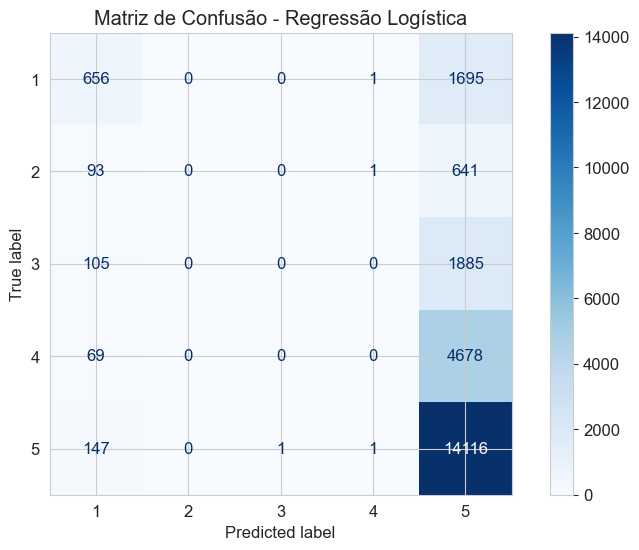

In [99]:
# 5. Baseline: Regressão Logística
print("\n5. Baseline: Regressão Logística")
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr, digits=3))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr), display_labels=lr.classes_).plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

In [ ]:
# Exemplo de uso: prever a nota de avaliação de um novo pedido (review_score)

# Suponha que você tenha um novo pedido com as seguintes features (exemplo fictício):
novo_pedido = {
    'dias_para_entrega': 5,
    'dias_atraso': 0,
    'outlier_tempo_entrega': 0,
    'atraso_extremo': 0,
    'entrega_muito_rapida': 0,
    'qtd_itens': 2,
    'qtd_produtos_unicos': 2,
    'qtd_vendedores': 1,
    'valor_total_produtos': 150.0,
    'valor_medio_item': 75.0,
    'std_valor_item': 0.0,
    'valor_min_item': 75.0,
    'valor_max_item': 75.0,
    'valor_total_frete': 20.0,
    'valor_medio_frete': 10.0,
    'std_valor_frete': 0.0,
    'ticket_medio': 75.0,
    'frete_percentual': 11.76,
    'pedido_multi_vendedor': 0,
    'diversidade_produtos': 1.0,
    'qtd_formas_pagamento': 1,
    'total_parcelas': 2,
    'media_parcelas': 2.0,
    'max_parcelas': 2,
    'valor_total_pago': 170.0,
    'valor_medio_pagamento': 170.0,
    'std_valor_pagamento': 0.0,
    'usa_credit_card': 1,
    'usa_boleto': 0,
    'usa_debit_card': 0,
    'usa_voucher': 0,
    'diversidade_pagamento': 1,
    'total_pedidos_cliente': 1,
    'frequencia_compra_mensal': 1.0,
    'cliente_recorrente': 0,
    'cliente_frequente': 0,
    'is_primeiro_pedido': 1,
    'produto_qtd_pedidos': 10.0,
    'produto_preco_medio': 75.0,
    'produto_popular': 0,
    'vendedor_qtd_pedidos': 50.0,
    'vendedor_ticket_medio': 80.0,
    'vendedor_alto_volume': 1,
    'vendedor_diversidade_produtos': 10.0,
    'mesmo_estado': 1
}

# Garantir que as features estejam na mesma ordem do treino
novo_X = pd.DataFrame([novo_pedido])[X_train.columns].fillna(0)

# Prever com o modelo Random Forest treinado
predito = rf.predict(novo_X)[0]
print(f"Review_score previsto para o novo pedido: {predito}")

### Random Forest

In [50]:
# 6. Random Forest
print("\n6. Random Forest")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, digits=3))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=rf.classes_).plot(cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.show()


6. Random Forest


KeyboardInterrupt: 

### XGBoost (caso disponível)

In [ ]:
# 7. XGBoost (caso disponível)
try:
    print("\n7. XGBoost")
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    print(classification_report(y_test, y_pred_xgb, digits=3))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=xgb.classes_).plot(cmap='Oranges')
    plt.title("Matriz de Confusão - XGBoost")
    plt.show()
except ImportError:
    print("XGBoost não instalado. Pule esta etapa.")

### 

In [ ]:
# 8. Redução de dimensionalidade para visualização (PCA)
print("\n8. Redução de dimensionalidade (PCA) para visualização")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_test, cmap='viridis', alpha=0.5)
plt.title("PCA dos dados de teste (colorido por review_score)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='review_score')
plt.show()

In [ ]:
# 9. Curva de aprendizado (Random Forest)

print("\n9. Curva de aprendizado - Random Forest")
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=3, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
plt.plot(train_sizes, train_mean, label='Treino')
plt.plot(train_sizes, test_mean, label='Teste')
plt.xlabel("Nº de amostras de treino")
plt.ylabel("Acurácia")
plt.title("Curva de aprendizado - Random Forest")
plt.legend()
plt.show()